In [52]:
import torch

def FSGM(model, inp, label, iters=5, eta=0.1):
    inp.requires_grad = True
    criterion = torch.nn.CrossEntropyLoss()
    minv, maxv = float(inp.min().detach().cpu().numpy()), float(inp.max().detach().cpu().numpy())
    # print(inp.shape)
    # print(label.shape)
    print(eta)
    for _ in range(iters):
        loss = criterion(model.forward(inp), label.flatten().long()).mean()
        dp = torch.sign(torch.autograd.grad(loss, inp)[0])
        inp.data.add_(eta*dp.detach()).clamp(minv, maxv)
    return inp


In [21]:
from models import ResNet18
import medmnist
from medmnist import INFO
from torchvision.transforms import transforms
import numpy as np

In [25]:
data_transforms = transforms.Compose([
                    transforms.ToTensor(),
                    transforms.Normalize(mean=[.5], std=[.5])
                    ])
data_flag = "breastmnist"
info = INFO[data_flag]
DataClass = getattr(medmnist, info["python_class"])
data_path = "./data"
download = True
train_dataset = DataClass(root=data_path, split='train', transform=data_transforms, download=download)


Using downloaded and verified file: ./data/breastmnist.npz


In [22]:
num_channels = train_dataset[0][0].shape[0]
num_classes = len(np.unique(train_dataset.labels))
model = ResNet18(in_channels=num_channels, num_classes=num_classes)

0.02


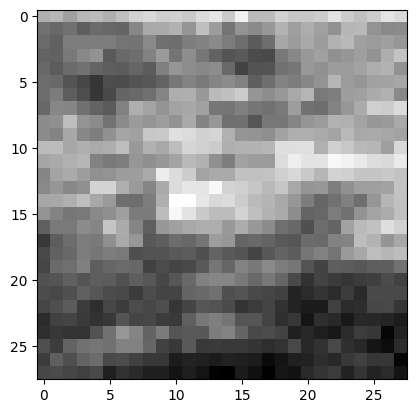

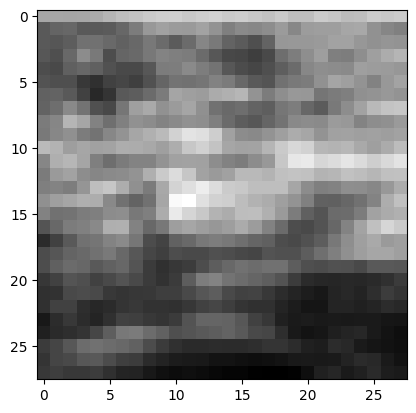

0.03


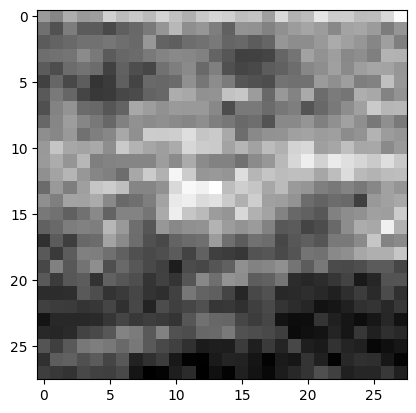

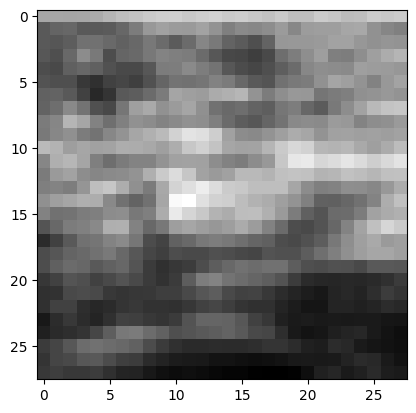

0.04


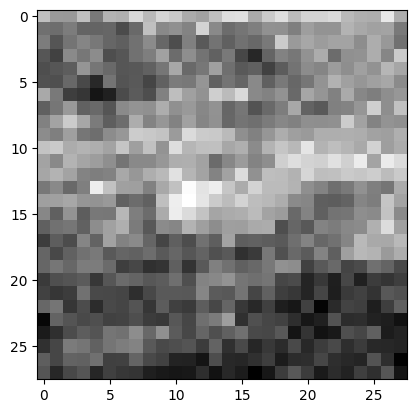

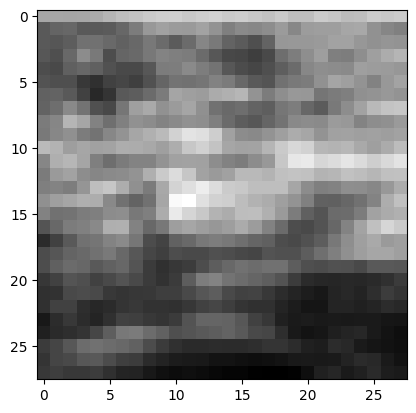

0.05


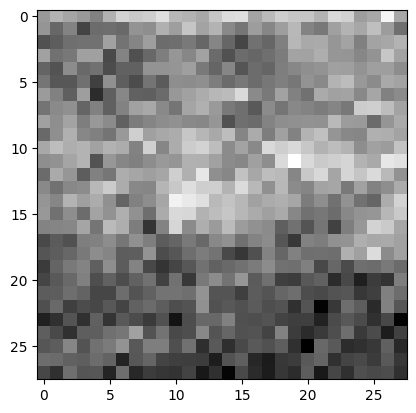

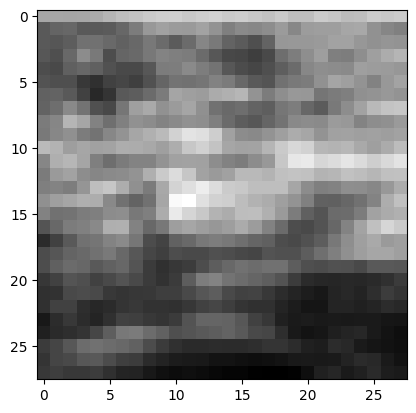

0.06


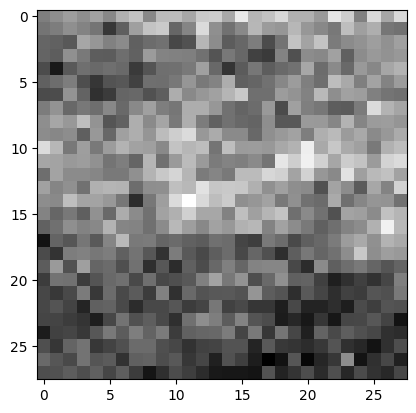

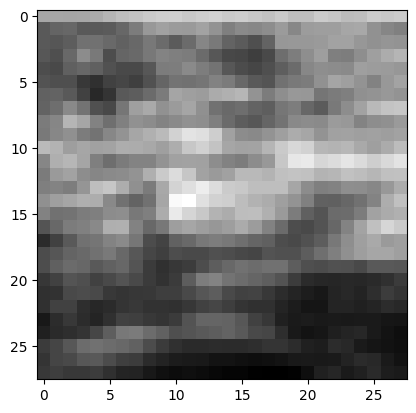

0.07


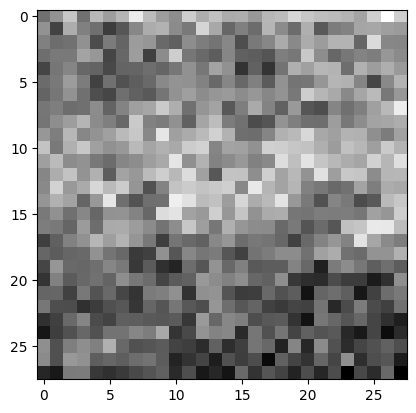

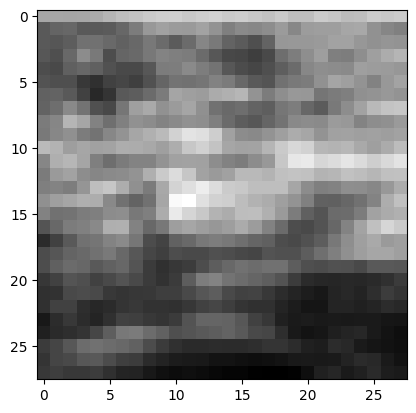

0.08


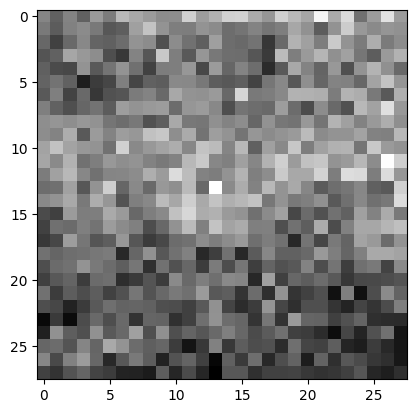

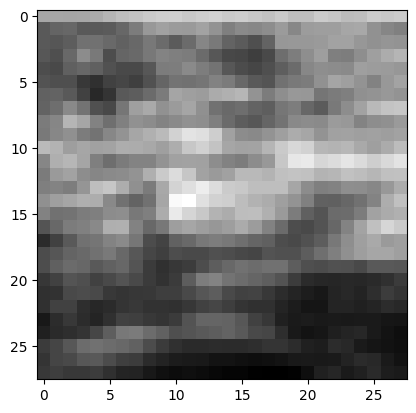

0.09


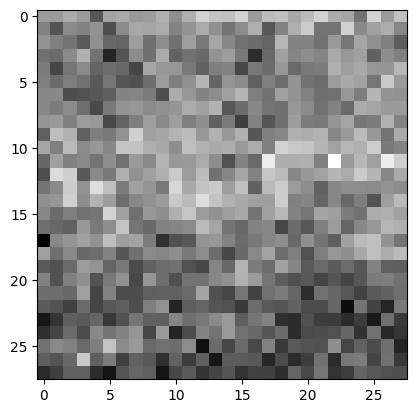

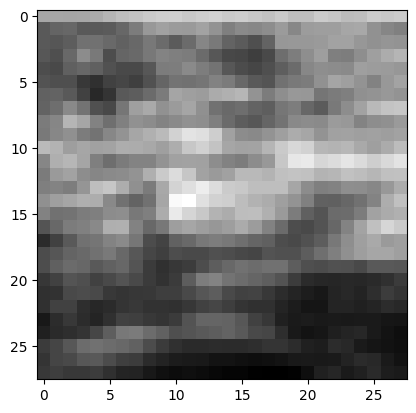

In [57]:
for i in range(2,10):
    pesudo_image = FSGM(model, train_dataset[0][0].unsqueeze(0), torch.Tensor(train_dataset[0][1]), iters=10, eta=i/100)
    plt.imshow(pesudo_image.squeeze(0).permute((1,2,0)).detach().numpy(), cmap="gray")
    plt.show()
    plt.imshow(train_dataset[0][0].reshape((28,28,1)), cmap="gray")
    plt.show()



In [37]:
import matplotlib.pyplot as plt

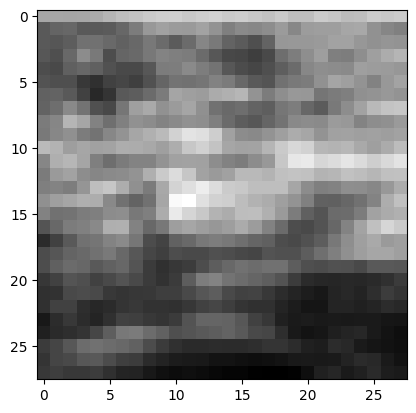

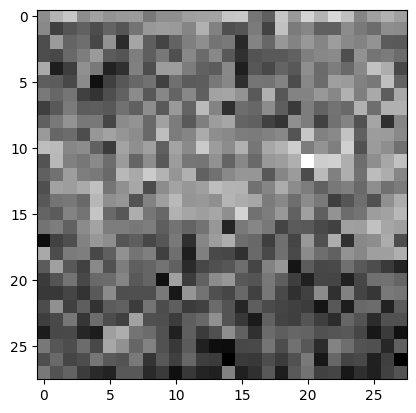